# Pairwise Relationships

**Abid Ali**

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

Skype: abd.soft

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
automobile_data = pd.read_csv('data/automobiles_data_processed.csv')
automobile_data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [8]:
automobile_data.dtypes


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [9]:
automobile_subset = automobile_data[['horsepower', 'city-mpg',
                                     'highway-mpg', 'price']]
automobile_subset.head()


,horsepower,city-mpg,highway-mpg,price
0,102,24,30,13950
1,115,18,22,17450
2,110,19,25,17710
3,140,17,20,23875
4,101,23,29,16430


<Figure size 1440x1440 with 0 Axes>

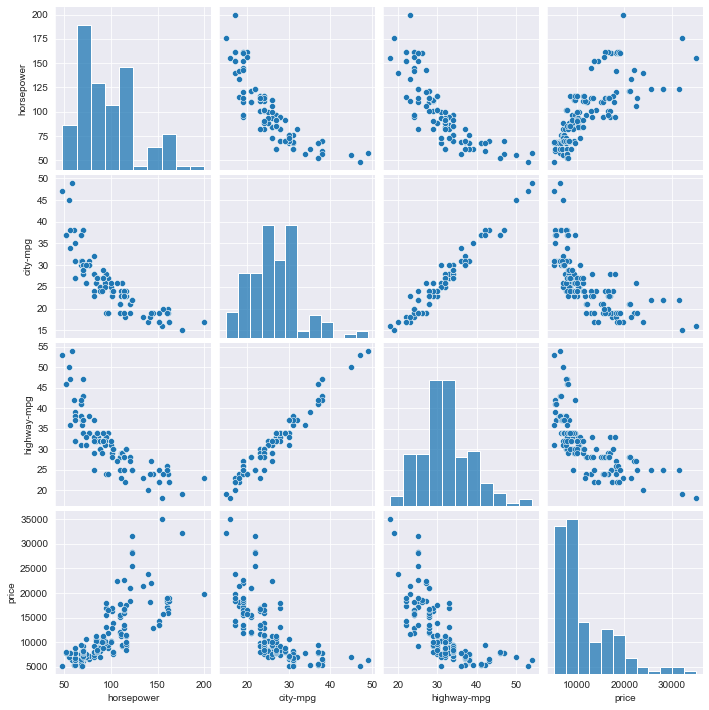

In [12]:
plt.figure(figsize=(20, 20))
sns.pairplot(automobile_subset)
plt.show()


<Figure size 2160x2160 with 0 Axes>

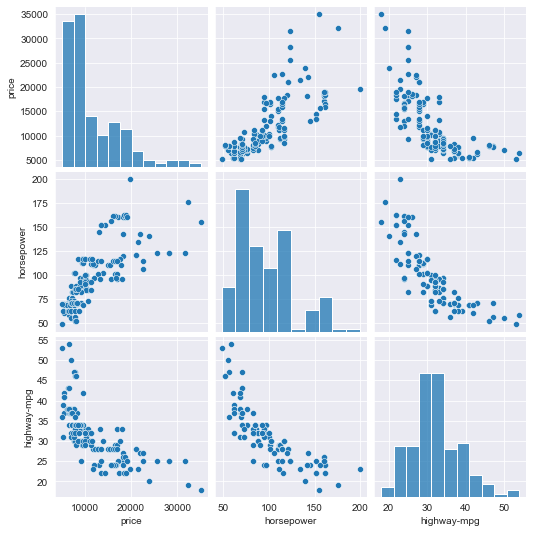

In [16]:
plt.figure(figsize=(30, 30))
sns.pairplot(
    automobile_data,
    vars=['price', 'horsepower', 'highway-mpg']
)
plt.show()


<Figure size 2160x2160 with 0 Axes>

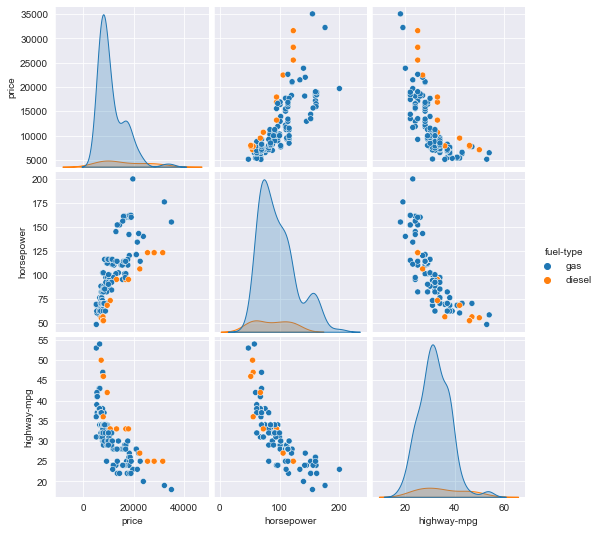

In [17]:
plt.figure(figsize=(30, 30))
sns.pairplot(
    automobile_data,
    vars=['price', 'horsepower', 'highway-mpg'],
    hue='fuel-type'
)
plt.show()


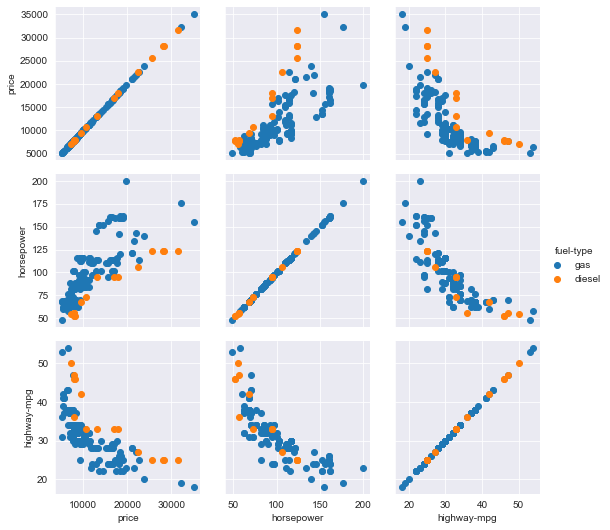

In [18]:
g = sns.PairGrid(automobile_data,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map(plt.scatter)
g.add_legend()
plt.show()

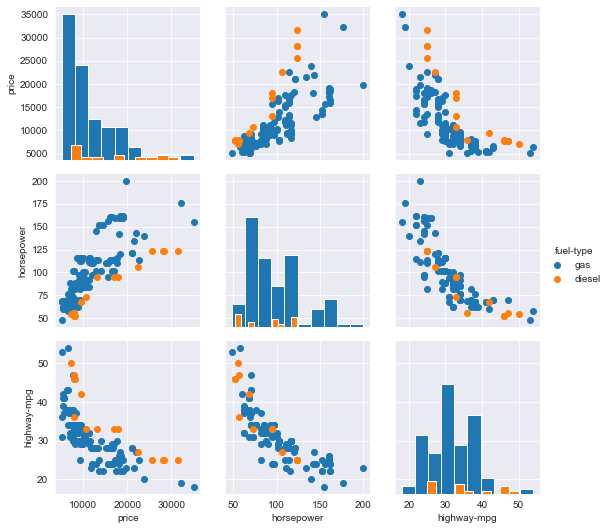

In [19]:
g = sns.PairGrid(automobile_data,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

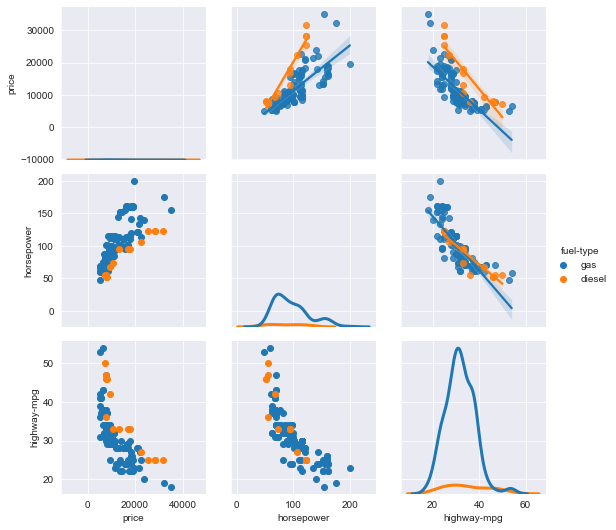

In [21]:
g = sns.PairGrid(automobile_data,
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_lower(plt.scatter)
g.add_legend()
plt.show()

In [22]:
automobile_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [23]:
automobile_corr = automobile_data[['engine-size', 'horsepower', 'peak-rpm', 'city-mpg',
                                   'highway-mpg', 'price']].corr()
automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


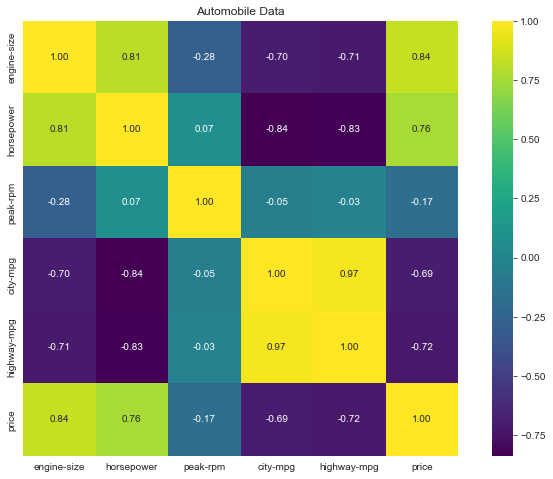

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    automobile_corr,
    square=True,
    fmt='.2f',
    cmap='viridis',
    annot=True,
)

plt.title('Automobile Data')
plt.show()